In [1]:
from mltrainer import CategorizerTrainer
from mlclassifier import Categorizer
from mlpreprocessor import Preprocessor
%matplotlib inline

Using Theano backend.


In [2]:
categories = ['bad_habits', 'education', 'alcohol', 'animals']
# inflicted_words_path = './inflicted_words'
methods = ['SVC', 'MultinomialNB']
features = ['words_raw']
train_data_path = './train.txt'
test_data_path = './test.txt'
model_save_path = './models_categories_spacy'

In [3]:
preprocessor = Preprocessor(tokenization='spacy')
print(preprocessor._tokenization)
preprocessor.prepare_data(train_data_path, categories, features)
train_data = preprocessor.data
preprocessor.balance_data()
train_data_balanced = preprocessor.data_balanced

spacy


bad_habits: zero=46159, one=16376 
education: zero=45721, one=16814 
alcohol: zero=47164, one=15371 
animals: zero=48432, one=14103 


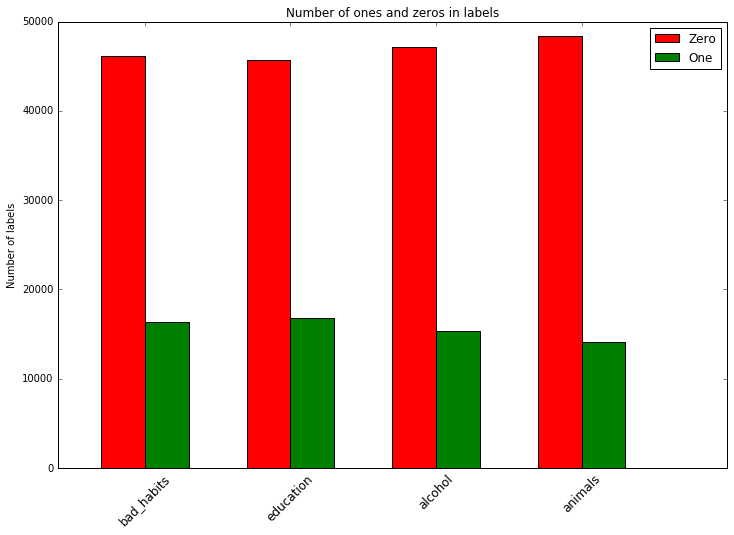

In [4]:
preprocessor.print_statistic()
preprocessor.draw_statistic()

bad_habits: zero=16376, one=16376 
education: zero=16814, one=16814 
alcohol: zero=15371, one=15371 
animals: zero=14103, one=14103 


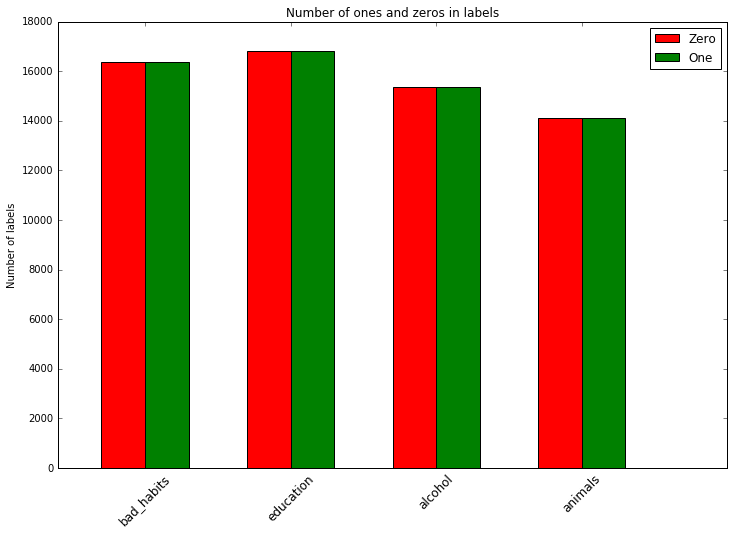

In [5]:
preprocessor.print_statistic(data_balanced=True)
preprocessor.draw_statistic(data_balanced=True)

In [6]:
trainer1 = CategorizerTrainer()
# trainer1.set_inflicted_words(inflicted_words_path)
trainer1.fit(train_data_balanced, methods, categories, features)
trainer1.save_models(model_save_path)

In [7]:
preprocessor.prepare_data(test_data_path, categories, features)
test_data = preprocessor.data
preprocessor.balance_data()
test_data_balanced = preprocessor.data_balanced

bad_habits: zero=11717, one=3917 
education: zero=11247, one=4387 
alcohol: zero=11820, one=3814 
animals: zero=12094, one=3540 


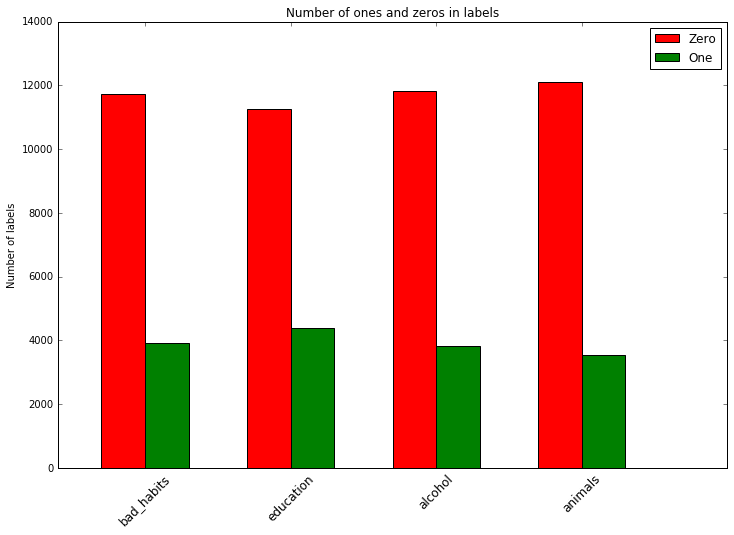

In [8]:
preprocessor.print_statistic()
preprocessor.draw_statistic()

bad_habits: zero=3917, one=3917 
education: zero=4387, one=4387 
alcohol: zero=3814, one=3814 
animals: zero=3540, one=3540 


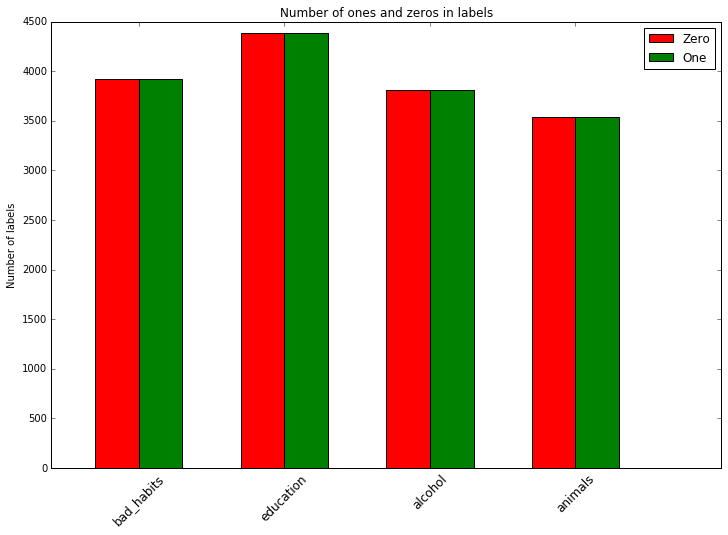

In [9]:
preprocessor.print_statistic(data_balanced=True)
preprocessor.draw_statistic(data_balanced=True)

In [10]:
trainer1.evaluate_models(test_data_balanced, save_metrics=True)
trainer1.print_metrics()

Model method: SVC
Category: education
rc=0.822429906542056 confusion_matrix=[[4134, 253], [779, 3608]] correct=7742 total=8774 f1=0.8748787584869059 acc=0.882379758377023 pr=0.9344729344729344
Category: animals
rc=0.9056497175141243 confusion_matrix=[[2939, 601], [334, 3206]] correct=6145 total=7080 f1=0.8727371716346808 acc=0.8679378531073446 pr=0.8421329130548989
Category: alcohol
rc=0.8130571578395386 confusion_matrix=[[3588, 226], [713, 3101]] correct=6689 total=7628 f1=0.8685058115109928 acc=0.8769008914525432 pr=0.9320709347760745
Category: bad_habits
rc=0.8126116926219045 confusion_matrix=[[3669, 248], [734, 3183]] correct=6852 total=7834 f1=0.8663581927054982 acc=0.874648966045443 pr=0.9277178665112212


Model method: MultinomialNB
Category: education
rc=0.8657396854342375 confusion_matrix=[[3886, 501], [589, 3798]] correct=7684 total=8774 f1=0.8745107068846418 acc=0.8757693184408479 pr=0.8834612700628053
Category: animals
rc=0.8293785310734463 confusion_matrix=[[3149, 391], [6

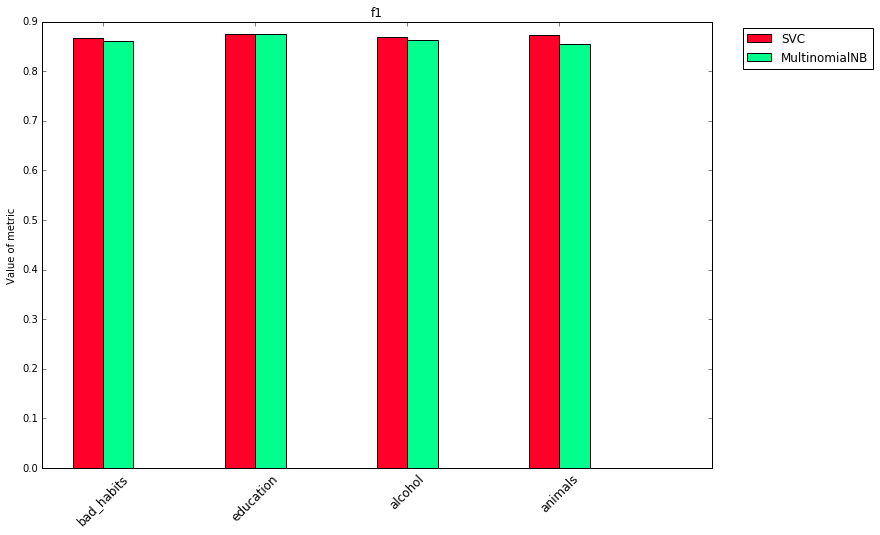

In [11]:
trainer1.draw_metrics('f1')

In [12]:
trainer2 = CategorizerTrainer()
trainer2.load_models(model_save_path)
print(trainer2._tokenization)

spacy


In [13]:
preprocessor2 = Preprocessor(tokenization='spacy')
print(preprocessor2._tokenization)
preprocessor2.prepare_data(test_data_path, categories, features)
test_data2= preprocessor2.data

trainer2.evaluate_models(test_data2)
trainer2.print_metrics()

spacy
Model method: SVC
Category: education
rc=0.8272167768406656 confusion_matrix=[[10544, 703], [758, 3629]] correct=14173 total=15634 f1=0.8324349122605803 acc=0.9065498272994755 pr=0.8377192982456141
Category: animals
rc=0.9098870056497175 confusion_matrix=[[10078, 2016], [319, 3221]] correct=13299 total=15634 f1=0.7339637689415518 acc=0.8506460278879365 pr=0.6150467825090701
Category: alcohol
rc=0.8167278447823807 confusion_matrix=[[11087, 733], [699, 3115]] correct=14202 total=15634 f1=0.8131036282954842 acc=0.9084047588588973 pr=0.8095114345114345
Category: bad_habits
rc=0.815930559101353 confusion_matrix=[[10918, 799], [721, 3196]] correct=14114 total=15634 f1=0.80788675429727 acc=0.9027760010234105 pr=0.8


Model method: MultinomialNB
Category: education
rc=0.8705265557328471 confusion_matrix=[[9878, 1369], [568, 3819]] correct=13697 total=15634 f1=0.7977023498694517 acc=0.8761033644620698 pr=0.7361218195836546
Category: animals
rc=0.834180790960452 confusion_matrix=[[10764, 1

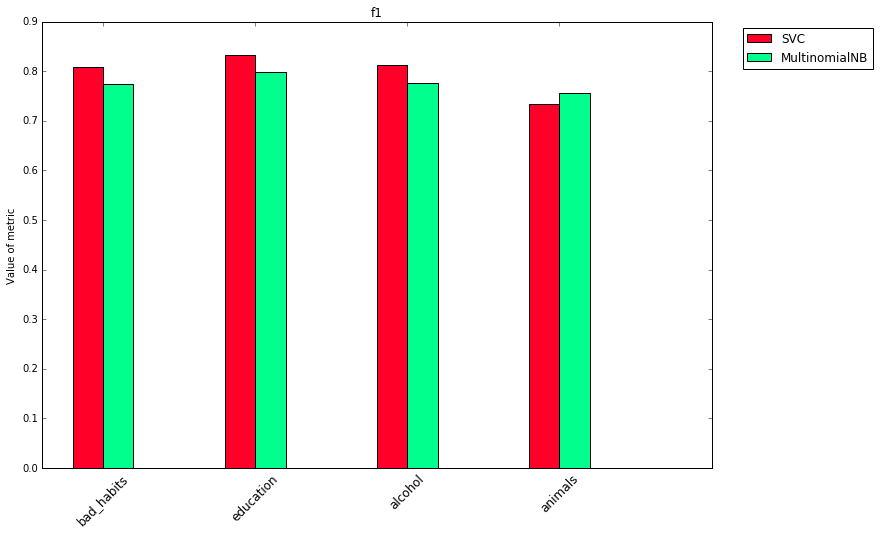

In [14]:
trainer2.draw_metrics('f1')